In [1]:
#import
import os 
import pandas as pd
import torch 
import IPython.display as ipd
import matplotlib.pyplot as plt
import random

#import modules
from model import BirdAudioClassifierModel
from utils import *
from classifier import BirdAudioClassifier

### Load the Bird Classifier

In [2]:
#Create the model
num_bird_classes = 88
model = BirdAudioClassifierModel(num_classes=num_bird_classes)
#load the trained model 
model.load_state_dict(torch.load('Models\model1.pth'))

In [4]:
#Initialize the classifier
confidence_threshold = 0.1 #set the minimum confidence needed for a classification to be valid
BirdClassifier = BirdAudioClassifier(model=model, confidence_threshold=confidence_threshold)

### Load an Audio File

In [9]:
#load metadata df 
current_dir = os.getcwd() 
file_name = "Dataset\\metadata.csv"
file_path = os.path.join(current_dir, file_name) 
df_metadata = pd.read_csv(file_path)
display(df_metadata)

#create dictionary with id to name mapping 
id_to_name_dict = dict(zip(df_metadata["class_id"], df_metadata["english_cname"]))
print(id_to_name_dict)

,file_id,original_file_id,english_cname,path,class_id
0,1,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
1,2,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
2,3,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
3,4,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
4,5,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
...,...,...,...,...,...
3543,3544,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75
3544,3545,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75
3545,3546,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75
3546,3547,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75


{0: 'Long-tailed Tit', 1: 'Eurasian Golden Oriole', 2: 'Wood Warbler', 3: 'Lesser Whitethroat', 4: 'Common Starling', 5: 'Eurasian Collared Dove', 6: 'Common Reed Bunting', 7: 'Common Linnet', 8: 'Yellowhammer', 9: 'Western Yellow Wagtail', 10: 'Wood Sandpiper', 11: 'Garden Warbler', 12: 'Spotted Flycatcher', 13: 'Goldcrest', 14: 'Eurasian Wryneck', 15: 'Common Redshank', 16: 'River Warbler', 17: 'European Honey Buzzard', 18: 'Eurasian Bullfinch', 19: 'Rock Dove', 20: 'Dunlin', 21: 'African Pied Wagtail', 22: 'Sedge Warbler', 23: 'Eurasian Magpie', 24: 'Redwing', 25: 'Common Pheasant', 26: 'Common Chaffinch', 27: 'Willow Warbler', 28: 'Western Jackdaw', 29: 'Common Chiffchaff', 30: 'Great Tit', 31: 'Corn Bunting', 32: 'Eurasian Skylark', 33: 'Common Nightingale', 34: 'European Greenfinch', 35: 'Eurasian Reed Warbler', 36: 'European Herring Gull', 37: 'Eurasian Jay', 38: 'Common Blackbird', 39: 'Black-headed Gull', 40: 'Willow Ptarmigan', 41: 'Eurasian Treecreeper', 42: 'Black Woodpecke

In [11]:
#open a random audio file 

#generate random number in range 
index = random.randint(0, len(df_metadata))
# index = 620 #for testing
print(index)

#get the path of the item at the specified index
audio_file_path = df_metadata.loc[index, "path"]
#get the class id 
class_id = df_metadata.loc[index, "class_id"]
#get the english bird name 
name = df_metadata.loc[index, "english_cname"]

#get the spectrogram 
waveform, sample_rate = AudioUtil.open_file(audio_file_path)        
spectrogram = AudioUtil.get_spectrogram(waveform)


2794


Shape of spectrograms: torch.Size([1, 401, 552]), Class ids: 81


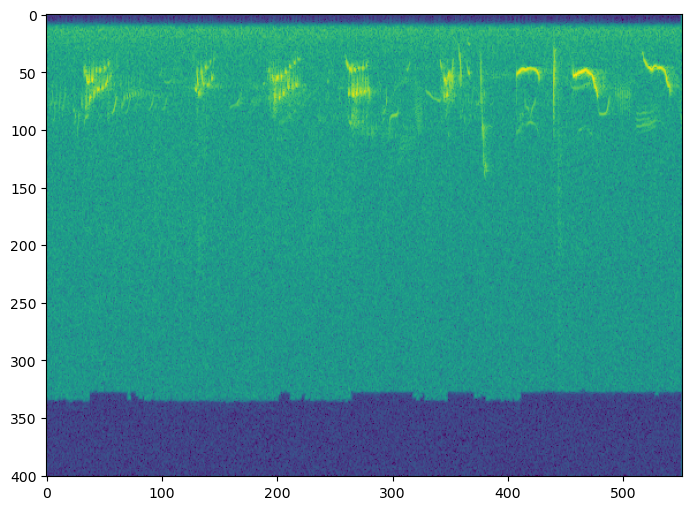

In [12]:
print(f"Shape of spectrograms: {spectrogram.size()}, Class ids: {class_id}")
plt.figure(figsize=(10, 6))
plt.imshow(spectrogram[0,:,:].numpy())

#make the sound wave availalbe
ipd.Audio(waveform.numpy(), rate=sample_rate)

In [13]:
pred_class, pred_confidence = BirdClassifier.predict_from_spectrogram(spectrogram=spectrogram)
print(f"Predicted bird name: {id_to_name_dict[pred_class]}, confidence: {round(pred_confidence*100, 3)}%")
print(f"Actual bird name: {name}")

Predicted bird name: Marsh Warbler, confidence: 90.1%
Actual bird name: Marsh Warbler


In [16]:
#For testing 
runn classification on every sample and check the ones where it does not work/the confidence is low, some of the data is not very good training data 
- maybe you can make a filter that filters bad training data (amount of power in signal in the 5 second clip) as the audio signal is not perfect when 
and the bird sound is not continous, maybe there is a better way of splitting the audio, (selecting 5 second snippets of interest) 

SyntaxError: incomplete input (3857640367.py, line 1)